# E-RETAIL FACTORS FOR CUSTOMER ACTIVATION AND RETENTION 

## Importing the Libraries

In [2]:
#Import libreries 

import pandas as pd #Data processing
import numpy as np #Linear algebra
from sklearn.preprocessing import StandardScaler #resize the distribution of values
from sklearn.linear_model import LinearRegression #algorithm
from sklearn.model_selection import train_test_split #estimate the performance
import statsmodels.api as sm 
import matplotlib.pyplot as plt #data visualization
import seaborn as sn  #data visualization

import warnings
warnings.filterwarnings("ignore")

Importing all neccessory Libreries

## Importing dataset

In [3]:
#Import the dataset

data= pd.read_excel(r"C:\Users\Chaitali Nakade\Downloads\Customer_retention_dataset--1-\Customer_retention_dataset\customer_retention_dataset.xlsx")
data.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


Importing the dataset and we can see columns with first five rows.

## EDA (Exploratory Data Analysis)

#### This dataset is having 71 columns. We can not see it directly. so, we need to put following instruction through which we can see all the column details.

In [4]:
pd.set_option('display.max_rows', None)

## Shape of data with number of rows and columns

In [5]:
data.shape

(269, 71)

There are 269 Rows and 71 Columns in dataset

## Basic information of dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

This instruction gives us basic information about all rows.

The dataset has 269 rows, 71 columns(variables). 1 of them are integer datatype and 71 are objects. 

## Detailed description

In [7]:
data.describe()

,4 What is the Pin Code of where you shop online from?
count,269.000000
mean,220465.747212
std,140524.341051
min,110008.000000
25%,122018.000000
50%,201303.000000
75%,201310.000000
max,560037.000000


We can see the detailed description of all the rows and columns which are having numeric data only. the detailed description like count, mean value, standard deviation, minimum and maximum value.

## Datatypes of all columns

In [8]:
data.dtypes

1Gender of respondent                                                                                                                                                                                                  object
2 How old are you?                                                                                                                                                                                                     object
3 Which city do you shop online from?                                                                                                                                                                                  object
4 What is the Pin Code of where you shop online from?                                                                                                                                                                   int64
5 Since How Long You are Shopping Online ?                                                                      

We have integer data type only in one column ==>  What is the Pin Code of where you shop online from?

Rest all are having object data type.

# Checking is there any null value

In [9]:
#check is there any null value present in any column

data.isnull().sum()

1Gender of respondent                                                                                                                                                                                                  0
2 How old are you?                                                                                                                                                                                                     0
3 Which city do you shop online from?                                                                                                                                                                                  0
4 What is the Pin Code of where you shop online from?                                                                                                                                                                  0
5 Since How Long You are Shopping Online ?                                                                                          

We can see There are NO missing values in dataset.

So, safe to proceed further.

### visualization of missing values by heatmap

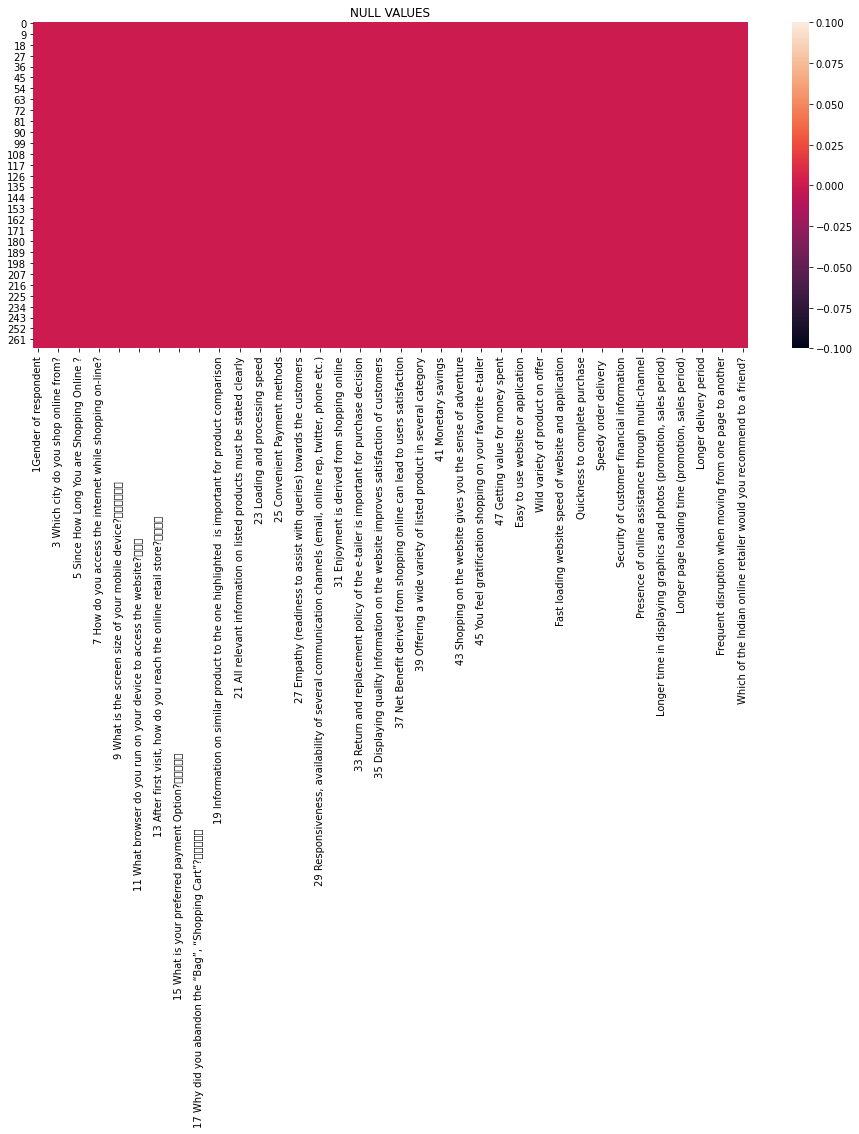

In [10]:
plt.figure(figsize=[16,6])
sn.heatmap(data.isnull())
plt.title("NULL VALUES")
plt.show()

we can see there is no missing values. If missing value is present than it will represent with white lines.

### Visualization (Uni Variate analysis)
Uni variate analysis works with only one variable, hence it is called uni variate.

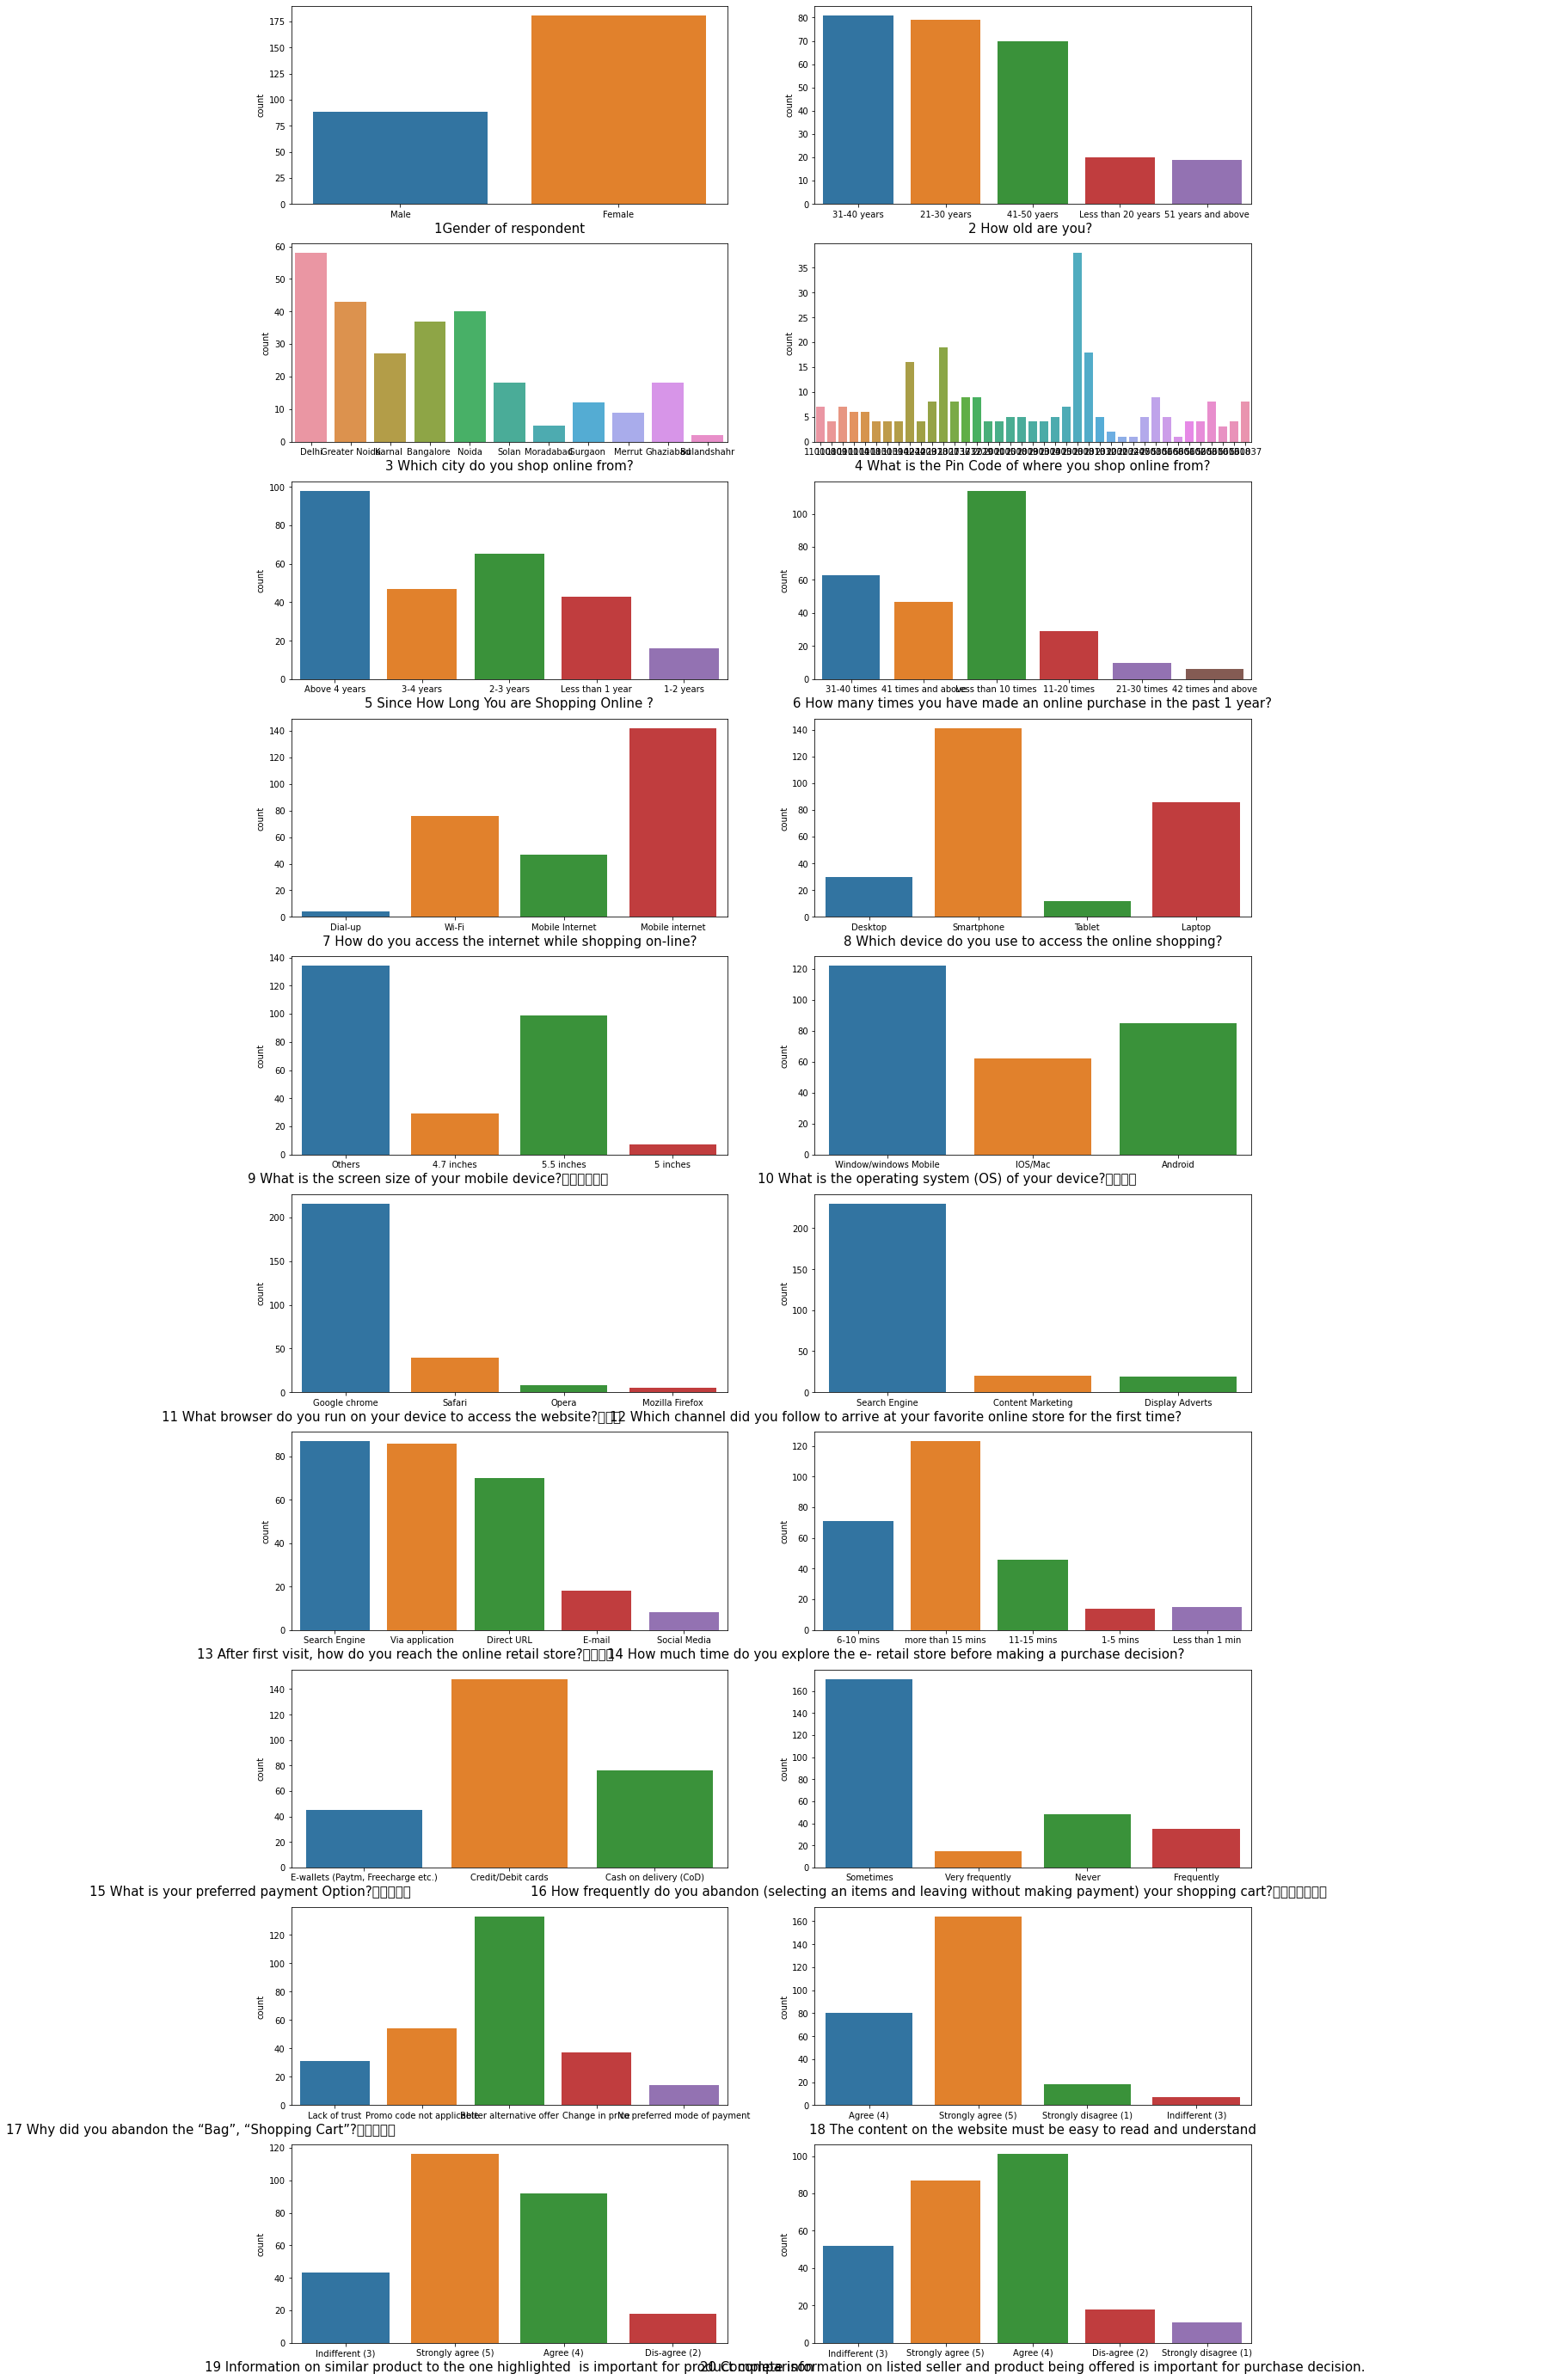

In [11]:
plt.figure(figsize = (20,50), facecolor = 'white')
plotnumber = 1

for column in data[0:20]:
    if plotnumber <= 20: # as we see there are eight columns in the data
        ax = plt.subplot(10,2,plotnumber)
        sn.countplot(data[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

1. Gender :- after visualizing the data we conclude that females are more likely do the shopping as compare to males
2. Age :- Majority of people whose age are lies in between 21 to 4o years are usally do the more shopping with the peak at age 31 to 40years
3. City :- Delhi people like to do more shopping as compare to other cities.
4. Pin Code of where you shop online :-
5. How Long You are Shopping Online :- more people trust on online shopping as we can see majority of peoples are having peak value 4 years.
6. times you have made an online purchase in the past 1 year :- after visualizing the data we can found that in past 1 year people doing shopping which is less than 10 times 
7. How do you access the internet while shopping on-line :- Mobile internet is priority of customers while doing online shopping.
8. screensize : screensize of any mobile does not affect the online shopping
9. operating system (OS) of your device :- windows phones more likely to used by people.
10. What browser do you run on your device to access the website :- we caan see google crome is the priority of peoplesto search online shopping portal.
11. channel did you follow to arrive at your favorite online store for the first time :- Search engine is priority of customers.
12. After first visit, how do you reach the online retail store :- as we found commonly customers are reaching to online shopping portal through application or through the search engine.
13. How much time do you explore the e- retail store before making a purchase decision? :- for buying products maximum customers likely to visit the website more than 15 minutes.
14. preferred payment Option :- majority of customers ae doing payments through credit or debit cards.
15. The content on the website must be easy to read and understand :- we can see content of website of online shopping portal are very clear
#### Above we discuss the some points which are very important in point of view of customers and online shoppers also, rest point will discuss below. 

In [12]:
fe= data[["21 All relevant information on listed products must be stated clearly", "22 Ease of navigation in website", "23 Loading and processing speed", "24 User friendly Interface of the website", "25 Convenient Payment methods", "26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time", "27 Empathy (readiness to assist with queries) towards the customers", "28 Being able to guarantee the privacy of the customer", "29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)", "30 Online shopping gives monetary benefit and discounts", "31 Enjoyment is derived from shopping online", "32 Shopping online is convenient and flexible", "33 Return and replacement policy of the e-tailer is important for purchase decision", "34 Gaining access to loyalty programs is a benefit of shopping online", "35 Displaying quality Information on the website improves satisfaction of customers", "36 User derive satisfaction while shopping on a good quality website or application", "37 Net Benefit derived from shopping online can lead to users satisfaction", "38 User satisfaction cannot exist without trust", "39 Offering a wide variety of listed product in several category", "40 Provision of complete and relevant product information"]]

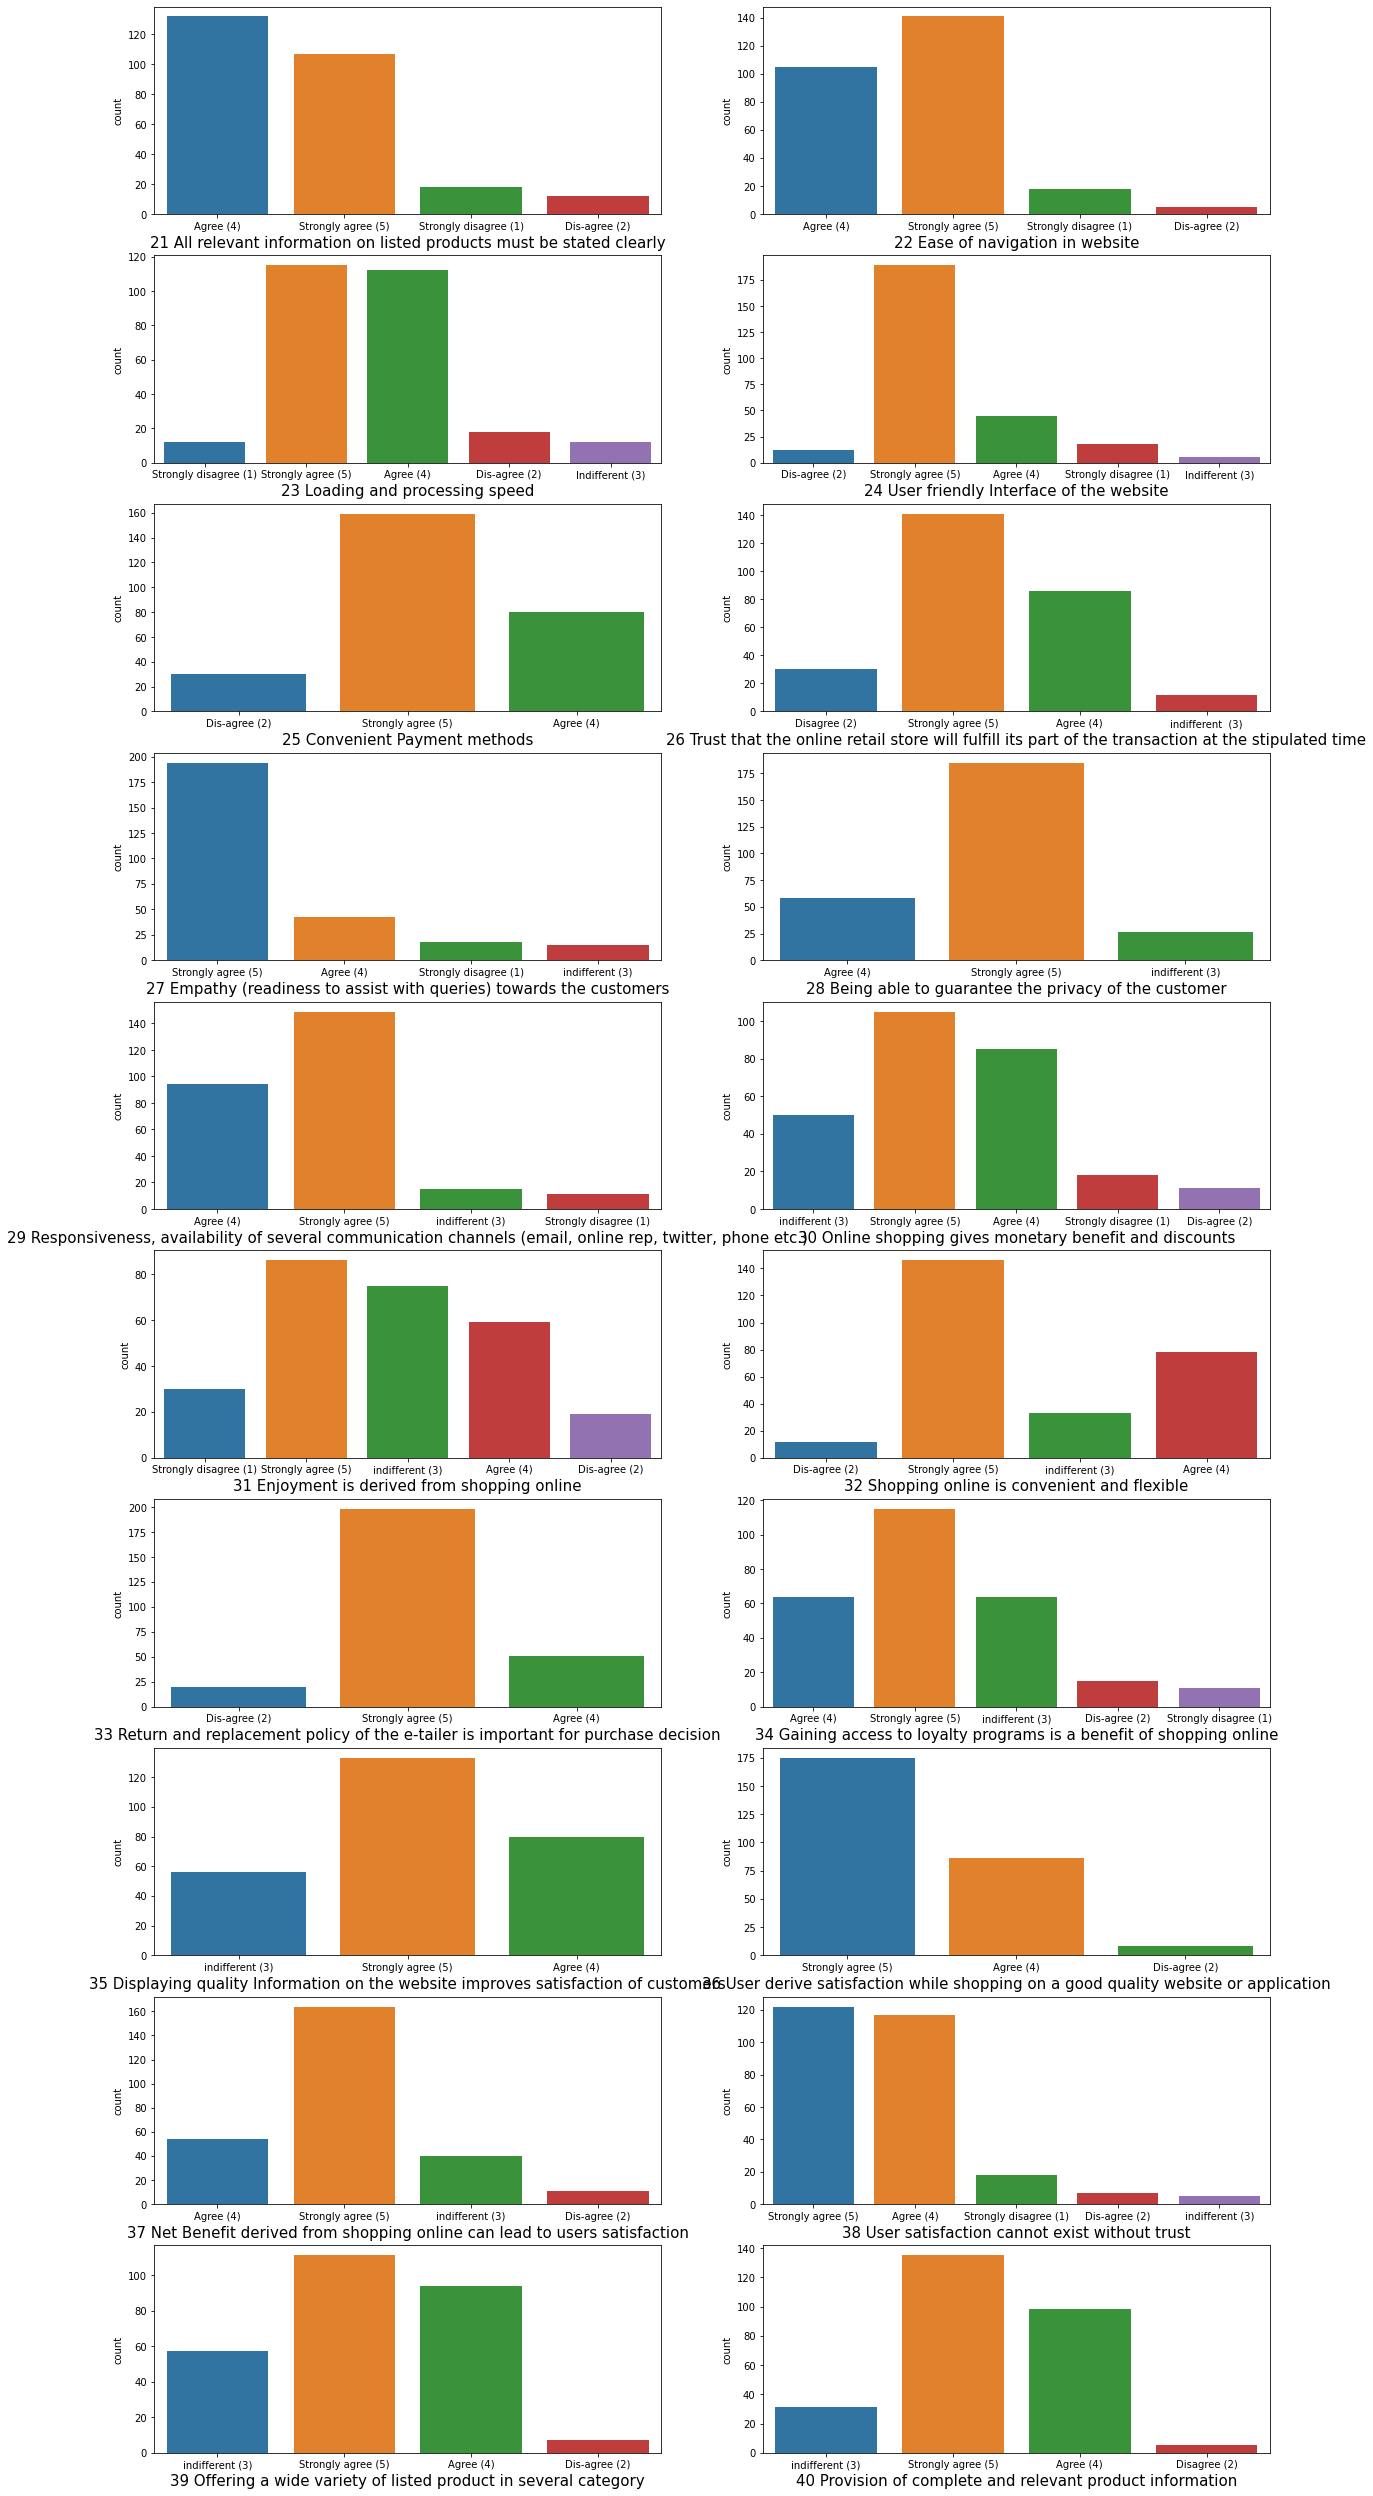

In [13]:
plt.figure(figsize = (20,45), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 20: # as we see there are 71 columns in the data
        ax = plt.subplot(10,2,plotnumber)
        sn.countplot(fe[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

1. "21 All relevant information on listed products must be stated clearly"
2. "22 Ease of navigation in website"
3. "23 Loading and processing speed"
4. "24 User friendly Interface of the website"
5. "25 Convenient Payment methods"
6. "26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time"
7. "27 Empathy (readiness to assist with queries) towards the customers"
8. "28 Being able to guarantee the privacy of the customer"
9. "29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)"
10. "30 Online shopping gives monetary benefit and discounts"
11. "31 Enjoyment is derived from shopping online"
12. "32 Shopping online is convenient and flexible"
13. "33 Return and replacement policy of the e-tailer is important for purchase decision"
14. "34 Gaining access to loyalty programs is a benefit of shopping online"
15. "35 Displaying quality Information on the website improves satisfaction of customers"
16. "36 User derive satisfaction while shopping on a good quality website or application"
17. "37 Net Benefit derived from shopping online can lead to users satisfaction"
18. "38 User satisfaction cannot exist without trust"
19. "39 Offering a wide variety of listed product in several category"
20. "40 Provision of complete and relevant product information"

#### we can see in above 20 variables, majority of customers are strongly agree with the services of online shopping portals like, it shows the relative products which they wants to buy, easy to use that applications, empathy, payment methods are convenient, and so many. all this things are very important for any online shopping portal or websites to attract the customers.
#### Very less customers are disagree with above points. To improve productivity they need less number of negative responce.

In [26]:
fe1= data[["41 Monetary savings", "42 The Convenience of patronizing the online retailer", "43 Shopping on the website gives you the sense of adventure", "44 Shopping on your preferred e-tailer enhances your social status", "45 You feel gratification shopping on your favorite e-tailer", "46 Shopping on the website helps you fulfill certain roles", "47 Getting value for money spent", "Easy to use website or application", "Visual appealing web-page layout", "Wild variety of product on offer", "Complete, relevant description information of products", "Fast loading website speed of website and application", "Reliability of the website or application", "Quickness to complete purchase", "Availability of several payment options", "Speedy order delivery "]]

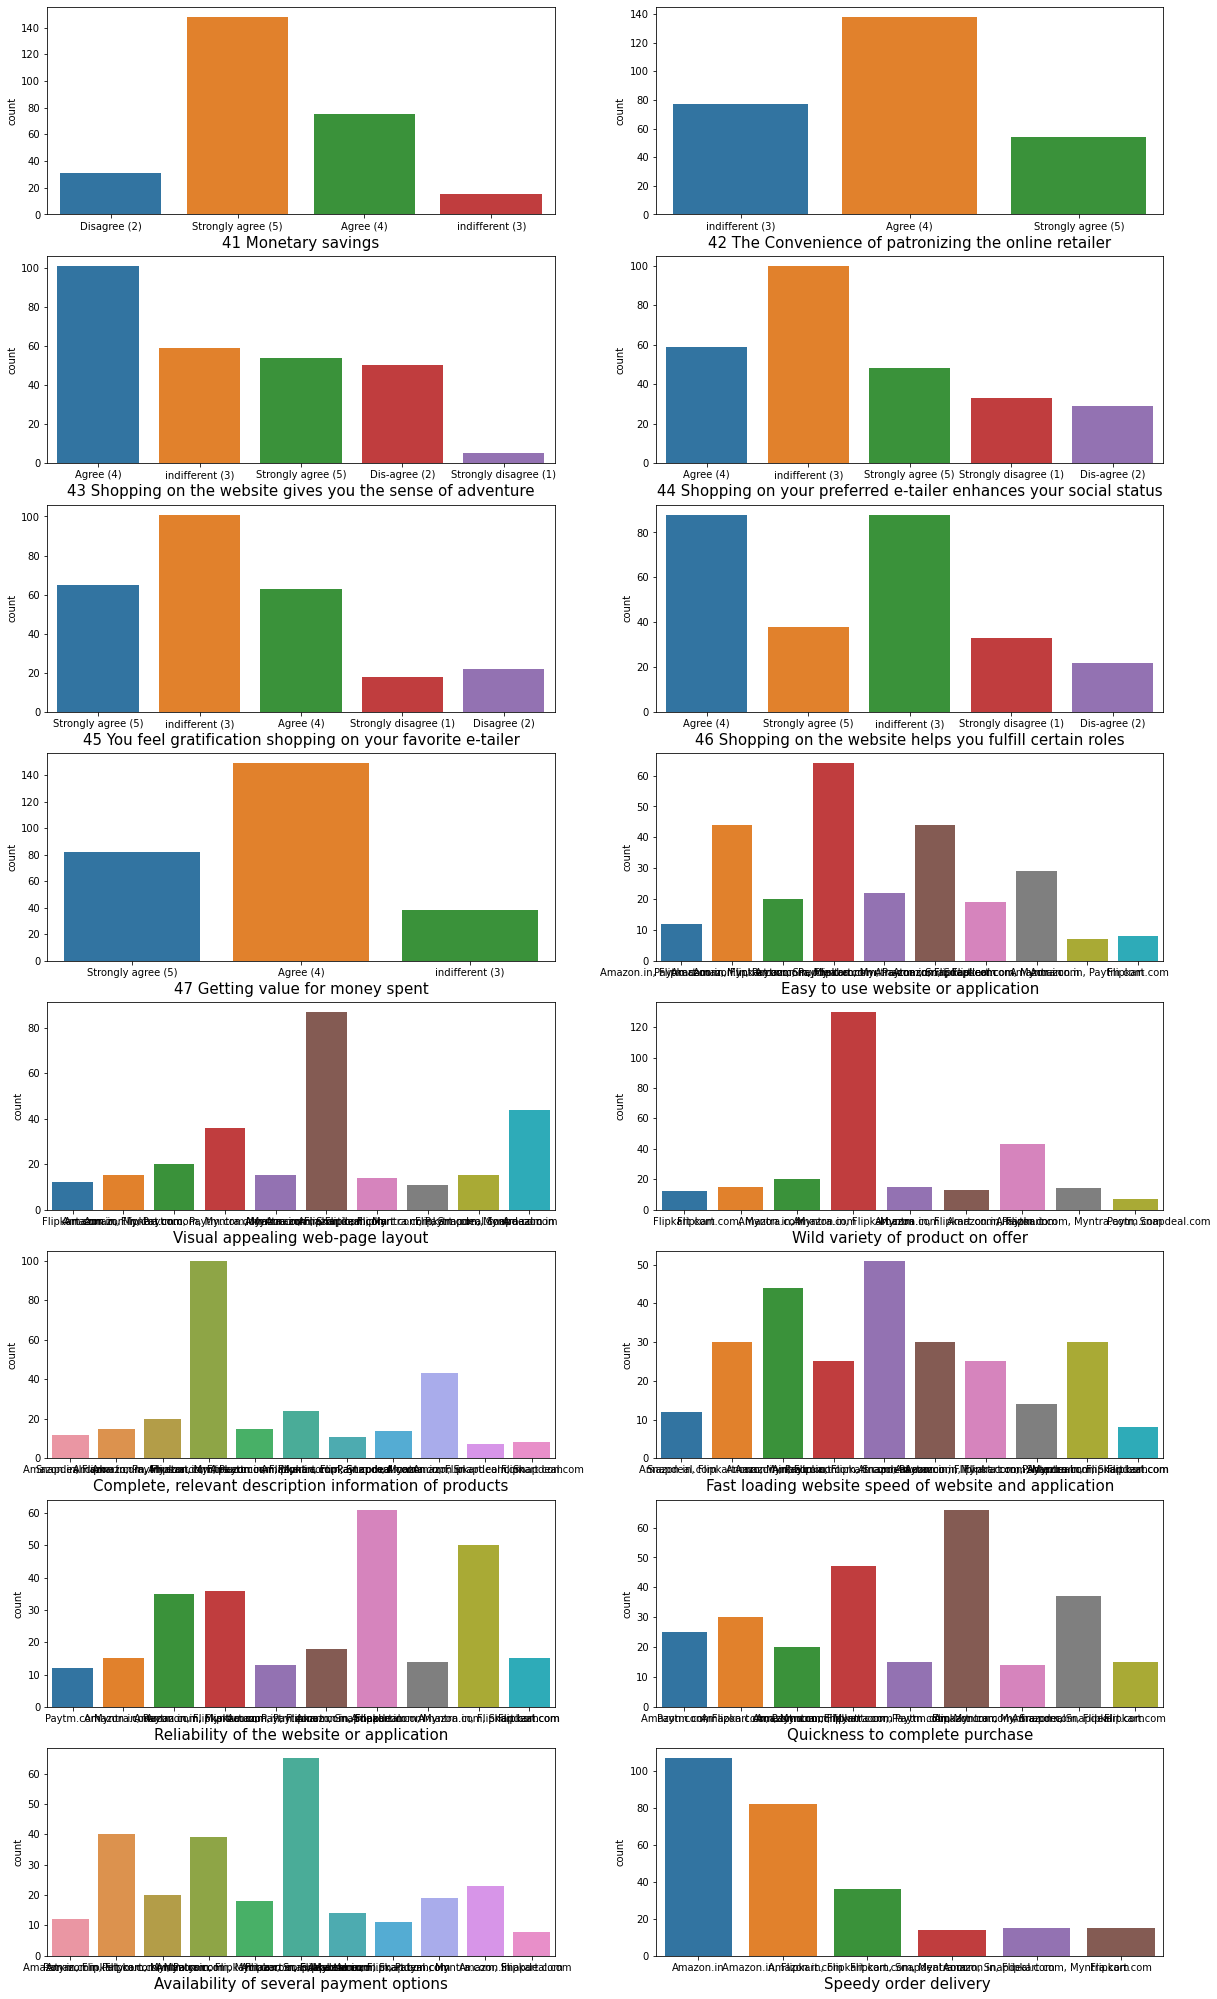

In [30]:
plt.figure(figsize = (20,45), facecolor = 'white')
plotnumber = 1

for column in fe1:
    if plotnumber <= 20: # as we see there are 71 columns in the data
        ax = plt.subplot(10,2,plotnumber)
        sn.countplot(fe1[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

1. "41 Monetary savings" :- majority of customers are strongly agree of financial saving
2. "42 The Convenience of patronizing the online retailer" :- majority of people are agree 
3. "43 Shopping on the website gives you the sense of adventure" :- less customer are disagree with this as compare to satisfied people 
4. "44 Shopping on your preferred e-tailer enhances your social status" 
5. "45 You feel gratification shopping on your favorite e-tailer"
6. "46 Shopping on the website helps you fulfill certain roles"
7. "47 Getting value for money spent" :- the product is giving value for money and customer are agree with that
8. "Easy to use website or application"
9. "Visual appealing web-page layout"
10. "Wild variety of product on offer"
11. "Complete, relevant description information of products"
12. "Fast loading website speed of website and application"
13. "Reliability of the website or application"
14. "Quickness to complete purchase"
15. "Availability of several payment options"
16. "Speedy order delivery " :- amazon.in are generally provide fast delivery as compare to other website

In [36]:
fe2 = data[["Privacy of customers’ information", "Security of customer financial information", "Perceived Trustworthiness", "Presence of online assistance through multi-channel", "Longer time to get logged in (promotion, sales period)", "Longer time in displaying graphics and photos (promotion, sales period)", "Late declaration of price (promotion, sales period)", "Longer page loading time (promotion, sales period)", "Limited mode of payment on most products (promotion, sales period)", "Longer delivery period", "Change in website/Application design", "Frequent disruption when moving from one page to another", "Website is as efficient as before", "Which of the Indian online retailer would you recommend to a friend?"]]

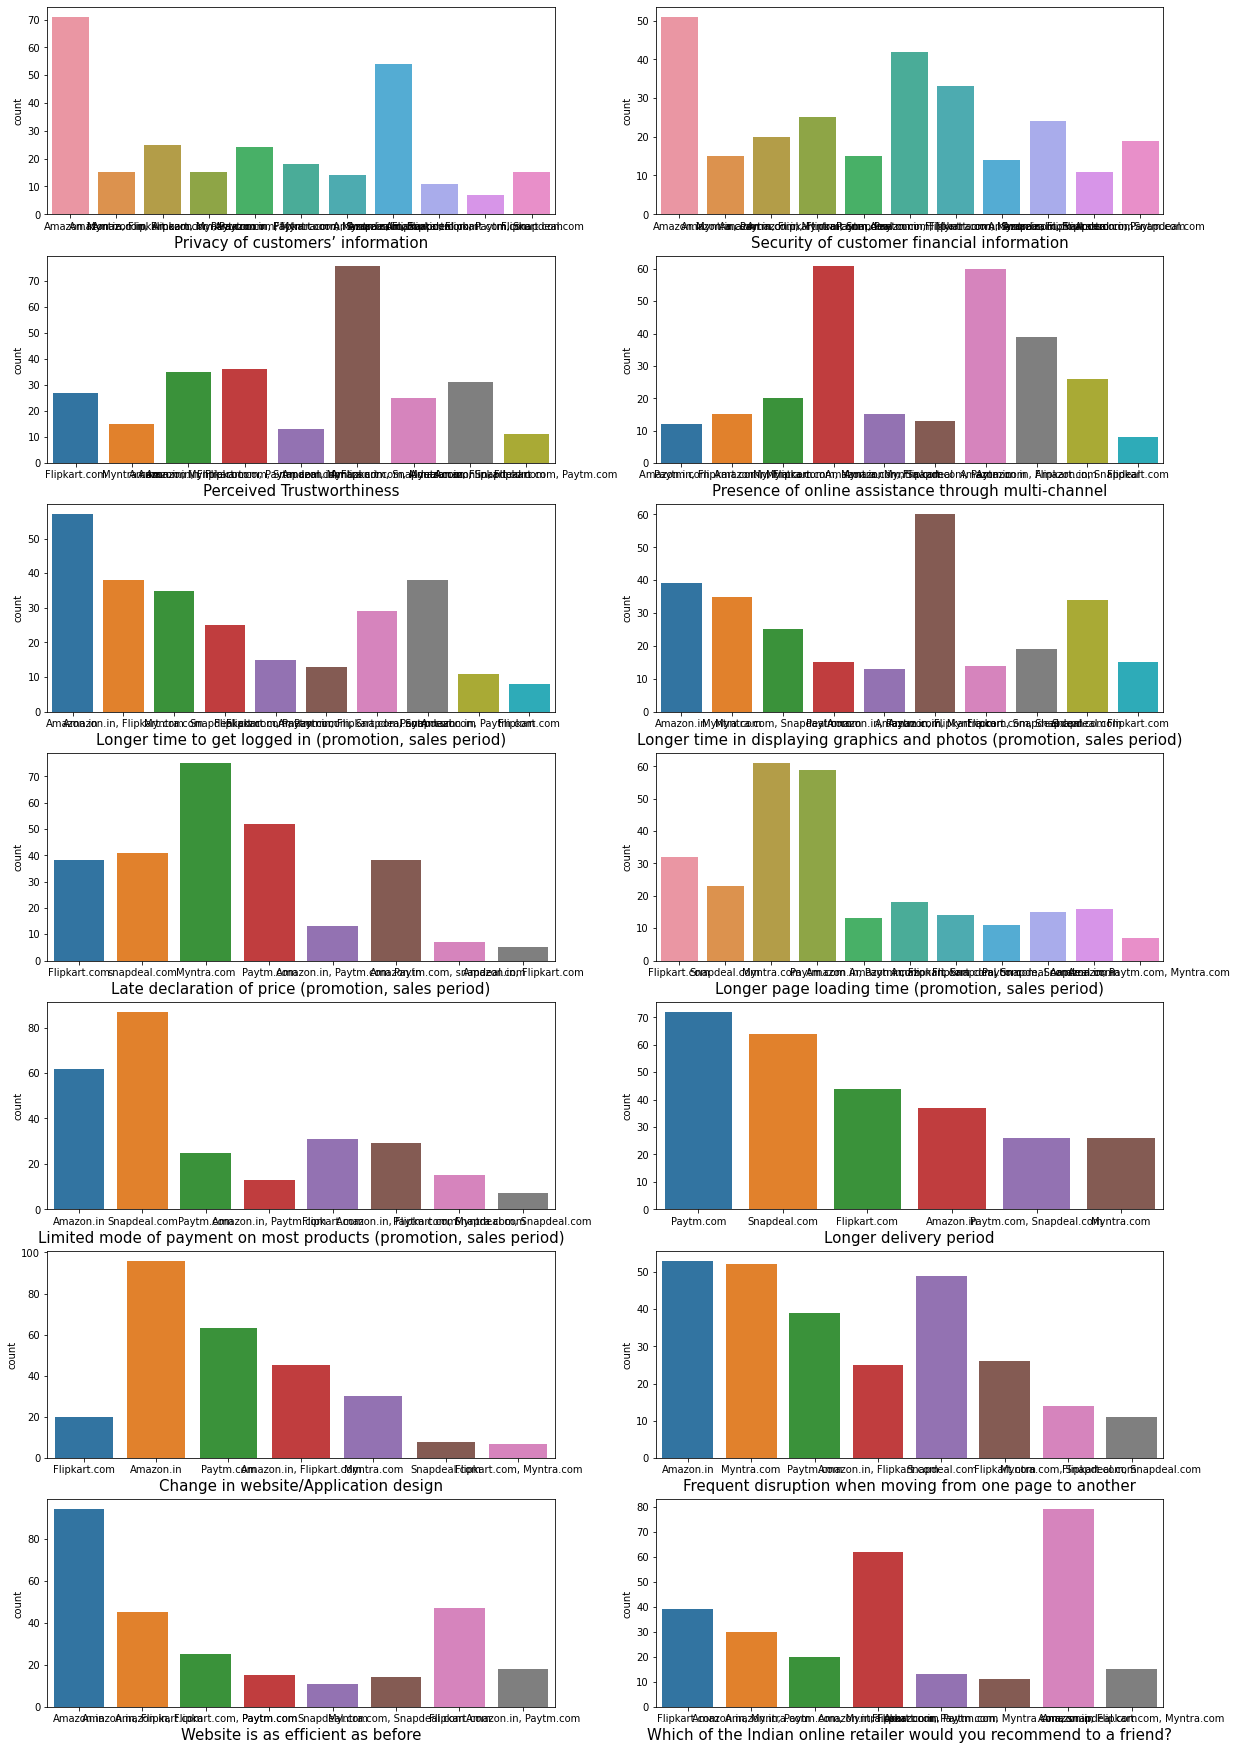

In [37]:
plt.figure(figsize = (20,45), facecolor = 'white')
plotnumber = 1

for column in fe2:
    if plotnumber <= 20: # as we see there are 71 columns in the data
        ax = plt.subplot(10,2,plotnumber)
        sn.countplot(fe2[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

#### Amazon.in is having more privacy as compare to other web sites
#### Amazon.in is having very secure financial services as compare to other websites
#### Amazon.in is taking too much to time to log in as compare to other websites
#### Myntra.com is declare very late price compare to other
#### majority of customers are facing loading of pages in websites and that weebsites are myntra and amazon with peak of myntra.com
#### Limited mode of payment on most products are having in snapdeal.com
#### We can see paytm.com and snapdeal.com taking longer delivery period with peak of paytm.com
#### change in design are more likely to see in amazin.in
#### as we can see majority of customer are likely to prefer and suggest amazon and myntra with peak of amazon.in. 

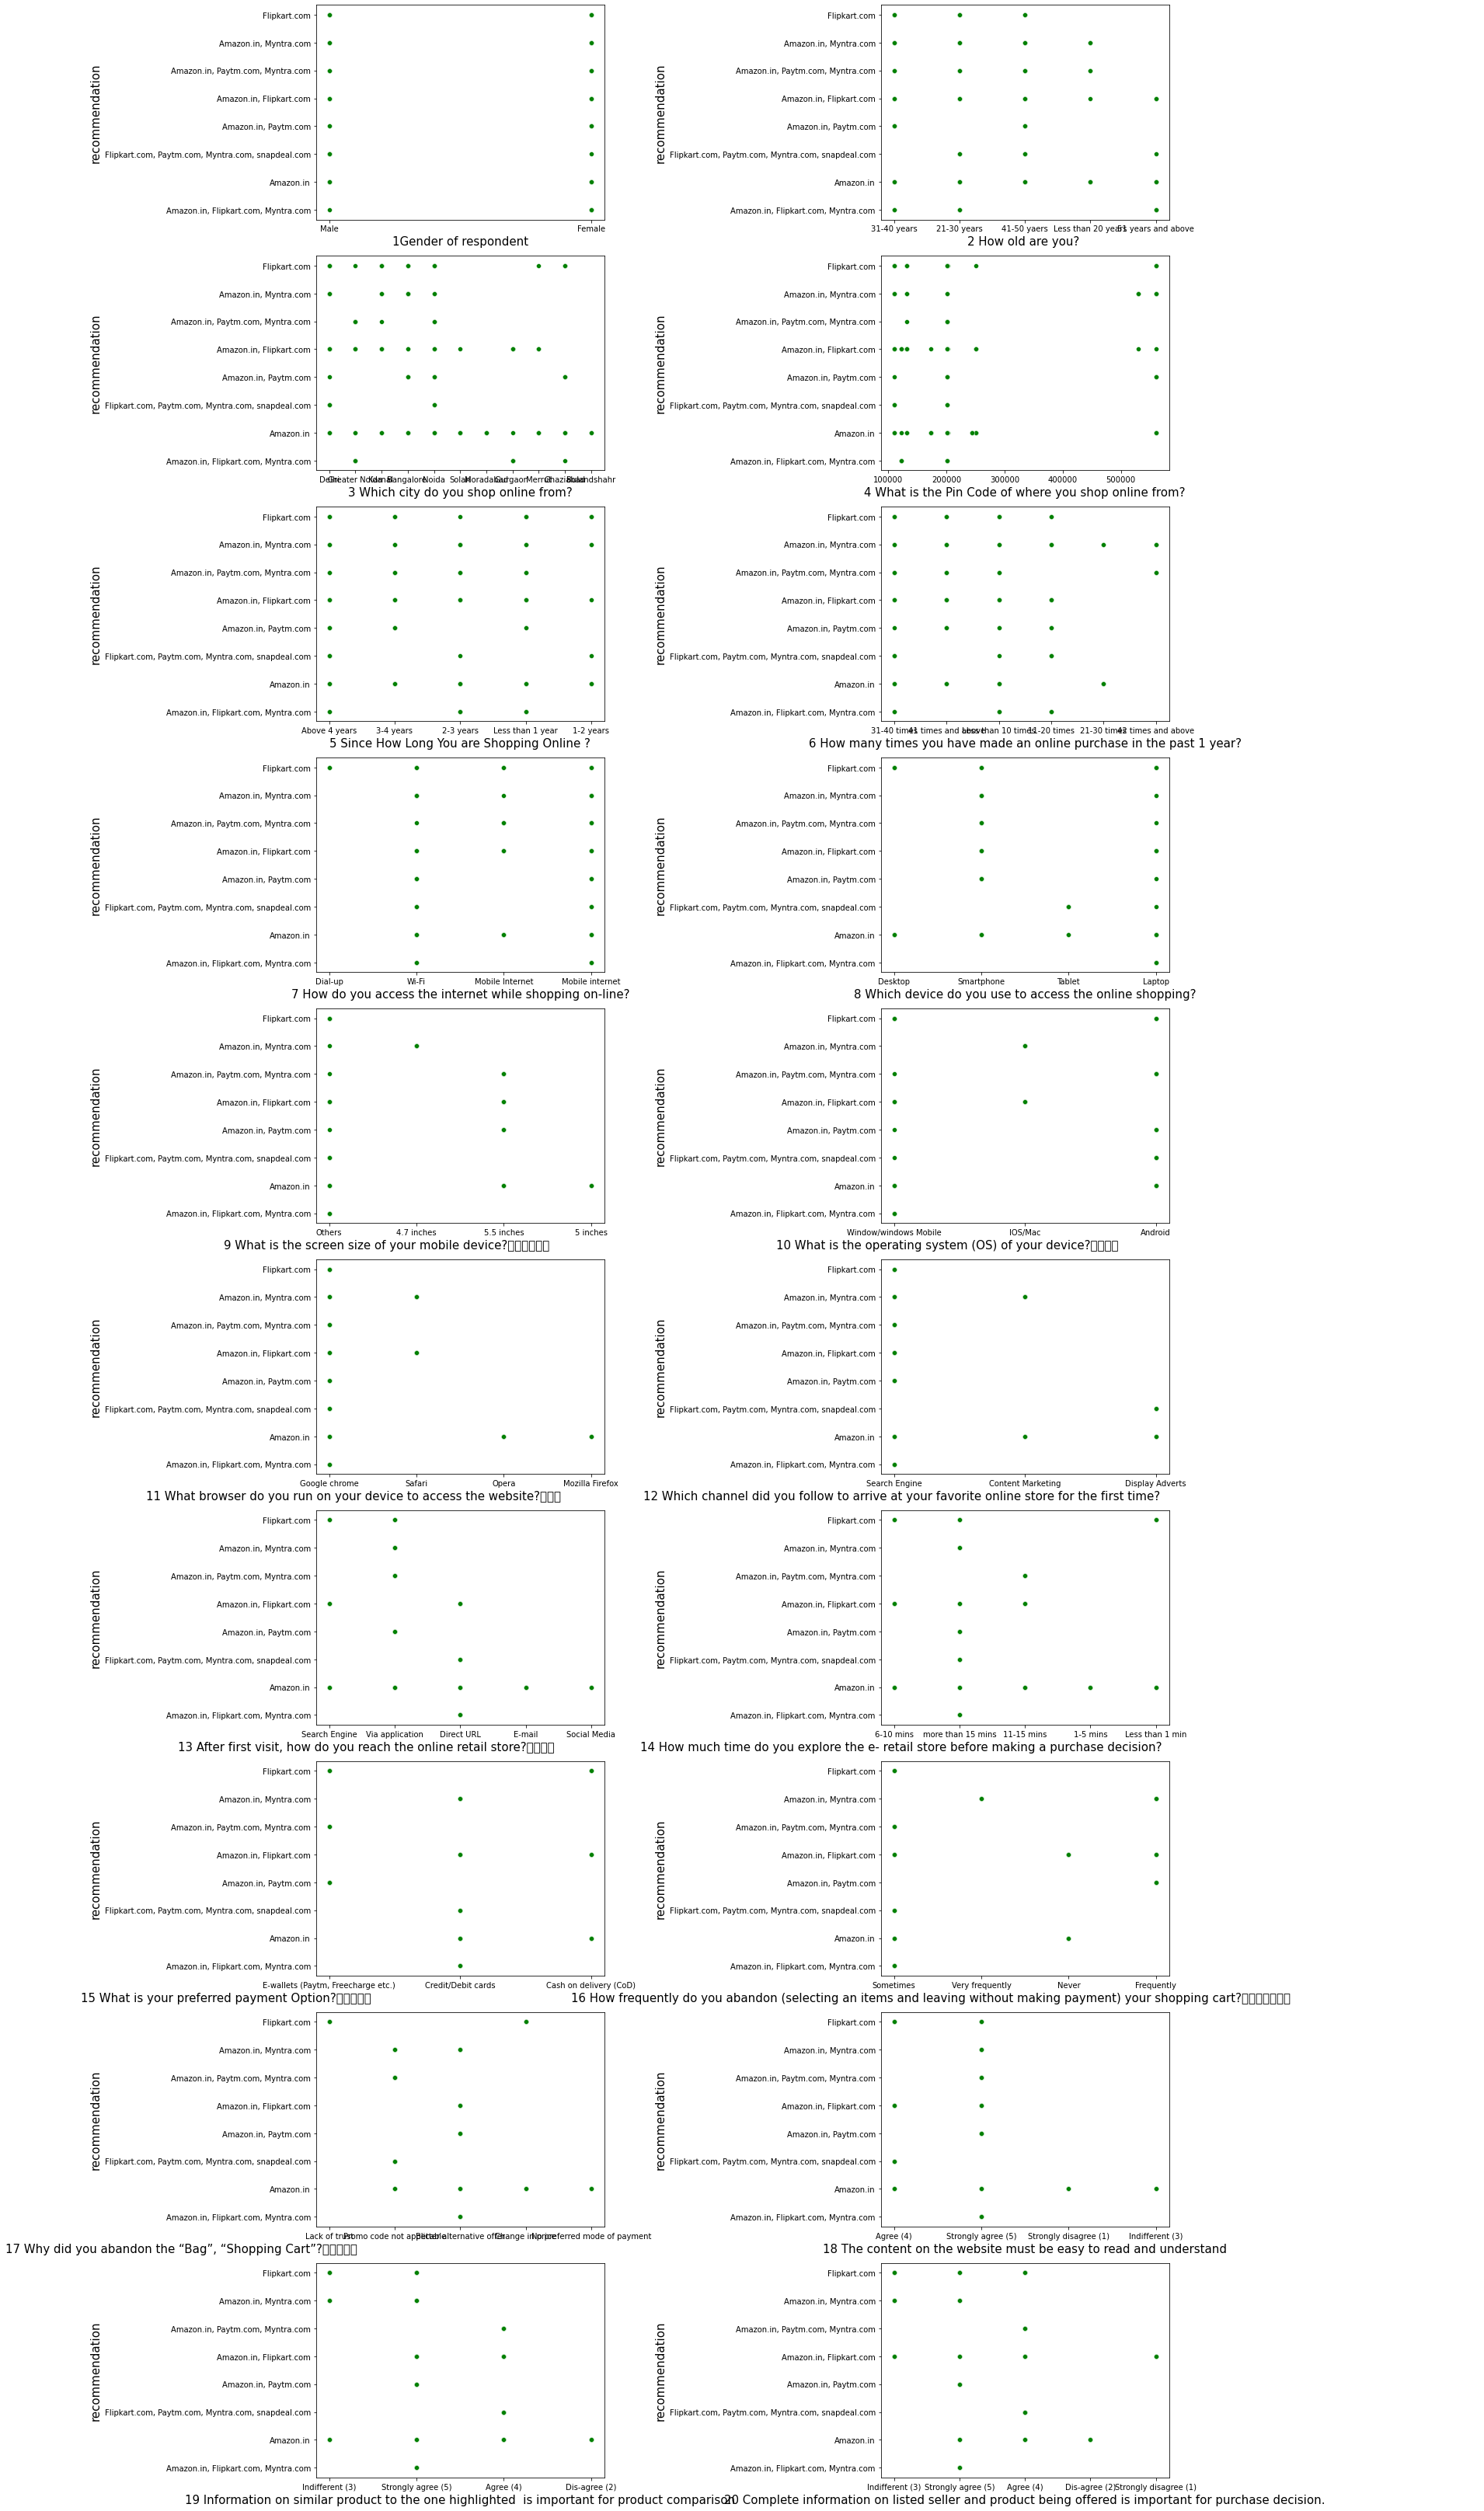

In [46]:
#Relationship Visualizing

plt.figure(figsize = (20,45), facecolor = 'white')
plotnumber = 1

for column in data[0:20]:
    if plotnumber <= 20:
        ax = plt.subplot(10,2,plotnumber)
        sn.scatterplot(data[column],data['Which of the Indian online retailer would you recommend to a friend?'], color='g')
        plt.xlabel(column,fontsize=15)
        plt.ylabel('recommendation', fontsize=15)
    plotnumber += 1
plt.tight_layout()

As we have seen in the scatterplot all columns are  categorical data in it, so no need to work on skewness and outliers.


### after analyzing the data we can found that the important factor which afffects the online shopping. Customer satisfaction one of the most important factor in any platform and e-retail shoppers gives priority to it. We can see people more attracted towards the online shopping because of all this significant factors. The market of online shopping will automatically increase if we improve the Quality of services.